<a target="_blank" href="https://colab.research.google.com/github/leonardocrociani/Intelligent-Systems-For-Pattern-Recognition/blob/main/image-understanding-lda.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any problems opening it in colab, check the footer of this notebook.

# ISPR - Midterm 2 - Assignment 2: Image understanding via LDA

*Author: Leonardo Crociani - Student ID: 615392*

I have aimed to make the code as self-explanatory as possible. The notebook includes both code and markdown explanations where necessary. I hope the work meets the requirements! 🙂

In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

## Data preparation

In [44]:
filenames = [ i for i in os.listdir('images_dataset') if i.endswith('.bmp') and not 'GT' in i ]
tr_filenames = []
ts_filenames = []

last_subset = None
for fname in filenames:
    subset, idx, _ = fname.split('_')
    if subset != last_subset and idx == '1':
        print('TS image:', fname)
        ts_filenames.append(fname)
        last_subset = subset
    else:
        tr_filenames.append(fname)

TS image: 1_1_s.bmp
TS image: 2_1_s.bmp
TS image: 3_1_s.bmp
TS image: 4_1_s.bmp
TS image: 5_1_s.bmp
TS image: 6_1_s.bmp
TS image: 7_1_s.bmp
TS image: 8_1_s.bmp


In [45]:
len(tr_filenames), len(ts_filenames)

(232, 8)

Found 163 keypoints
Descriptors shape: (163, 128)


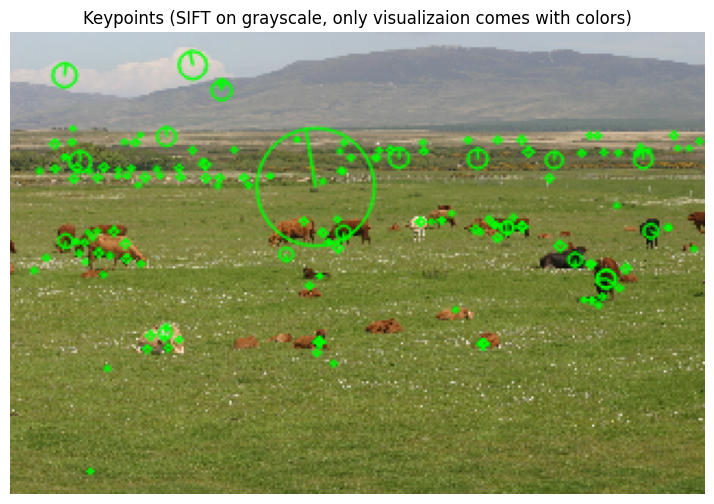

In [47]:
def process_image(img_path, visualize=False):
    image_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    sift = cv2.SIFT_create()
    keypoints = sift.detect(image_gray, None)
    keypoints, descriptors = sift.compute(image_gray, keypoints)

    if visualize:
        print(f'Found {len(keypoints)} keypoints')
        print(f'Descriptors shape: {descriptors.shape}') 
        image_color = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image_with_keypoints = cv2.drawKeypoints(
            image_color, keypoints, None,
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
            color=(0, 255, 0)
        )
        plt.figure(figsize=(10, 6))
        plt.imshow(image_with_keypoints[..., ::-1]) 
        plt.title('Keypoints (SIFT on grayscale, only visualizaion comes with colors)')
        plt.axis('off')
        plt.show()

    return keypoints, descriptors

_ = process_image(
    f'images_dataset/{tr_filenames[0]}', 
    visualize=True
)

In [50]:
TR = { 'keypoints' : [], 'descriptors' : [] }
TS = { 'keypoints' : [], 'descriptors' : [] }

def extract_keypoints_and_descriptors(filenames_set, destination_set):
    for img in tqdm(filenames_set, desc='Applying SIFT'):
        keypoints, descriptors = process_image(f'images_dataset/{img}')
        destination_set['descriptors'].append(descriptors)
        destination_set['keypoints'].append(keypoints)

extract_keypoints_and_descriptors(tr_filenames, TR)
extract_keypoints_and_descriptors(ts_filenames, TS)

Applying SIFT: 100%|██████████| 8/8 [00:00<00:00, 28.65it/s]


Computing kmeans for different Ks: 100%|██████████| 6/6 [18:07<00:00, 181.26s/it]


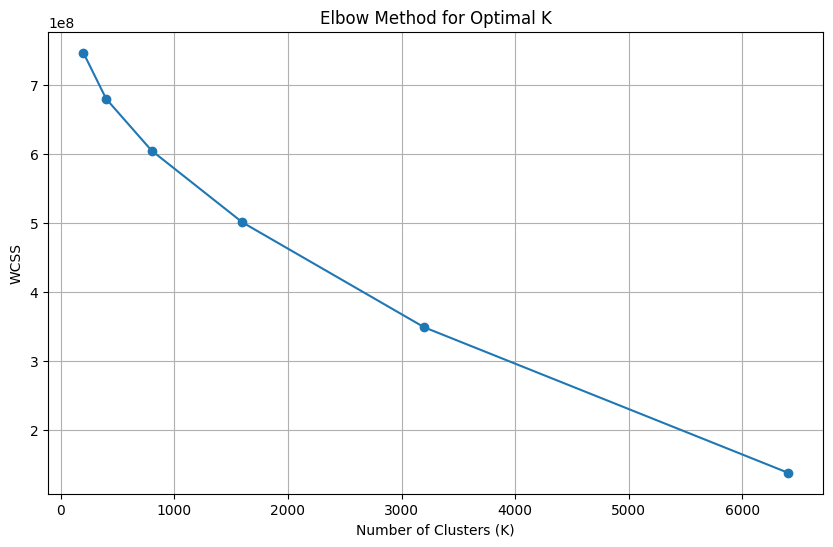

In [64]:
all_descriptors = np.vstack([desc for desc in TR['descriptors'] if desc is not None])
kmeans = KMeans(all_descriptors, K=500) # vocabulary of 500 items

In [59]:
all_descriptors.shape

(106524, 128)

## Conclusions


I hope you enjoyed the notebook! 😊

### References:

- Youtube video (regarding the order of the ARMA model) - channel of Lasse Engbo Christiansen, Associate professor in statistics at the Technical University of Denmark: [https://www.youtube.com/watch?v=ZE_WGBe0_VU&ab_channel=LasseEngboChristiansen](https://www.youtube.com/watch?v=ZE_WGBe0_VU&ab_channel=LasseEngboChristiansen)

- Wikipedia (ARIMA models): [https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

- PmdArima Documentation: [https://alkaline-ml.com/pmdarima](https://alkaline-ml.com/pmdarima)

- Our lectures :)

### Links:

- Link to open the github repo: [https://github.com/leonardocrociani/Intelligent-Systems-For-Pattern-Recognition/blob/main/image-understanding-lda.ipynb](https://github.com/leonardocrociani/Intelligent-Systems-For-Pattern-Recognition/blob/main/image-understanding-lda.ipynb)

- Link to open it in colab: [https://colab.research.google.com/github/leonardocrociani/Intelligent-Systems-For-Pattern-Recognition/blob/main/image-understanding-lda.ipynb](https://colab.research.google.com/github/leonardocrociani/Intelligent-Systems-For-Pattern-Recognition/blob/main/image-understanding-lda.ipynb)